In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load pickled data
import pickle
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.io.parsers import read_csv


## Loading datasets
training_file = '/content/drive/MyDrive/Dataset/GTSDS/train.p'
validation_file='/content/drive/MyDrive/Dataset/GTSDS/valid.p'
testing_file = '/content/drive/MyDrive/Dataset/GTSDS/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

sign_names = read_csv("/content/drive/MyDrive/Dataset/GTSDS/signname.csv").values[:, 1]

#Separating features and labels
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
#Dataset Summary & Exploration
# Number of training examples
n_train = X_train.shape[0]
# Number of validation examples
n_validation = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# Unique classes/labels there are in the dataset.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


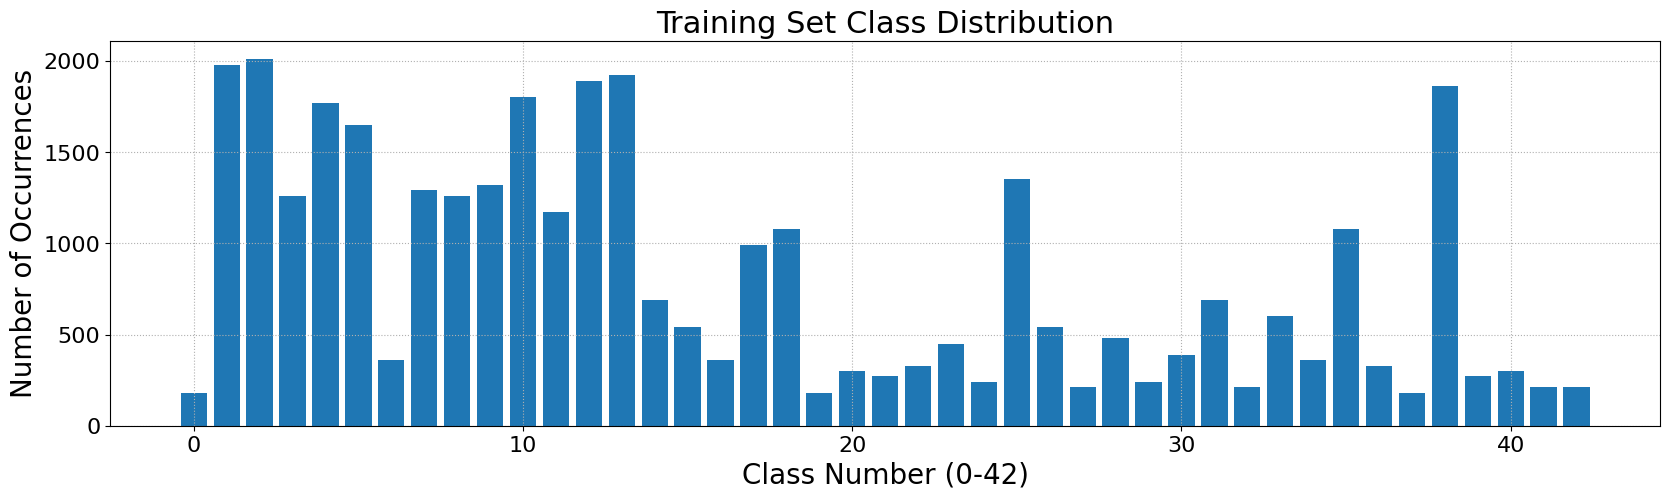

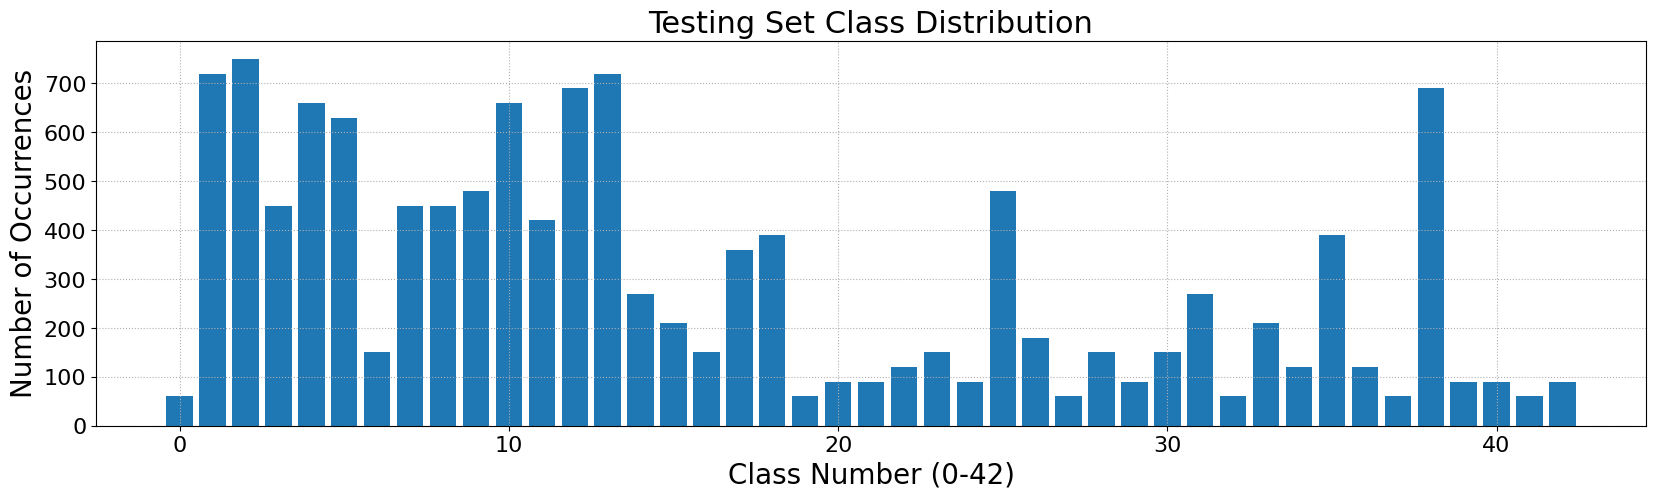

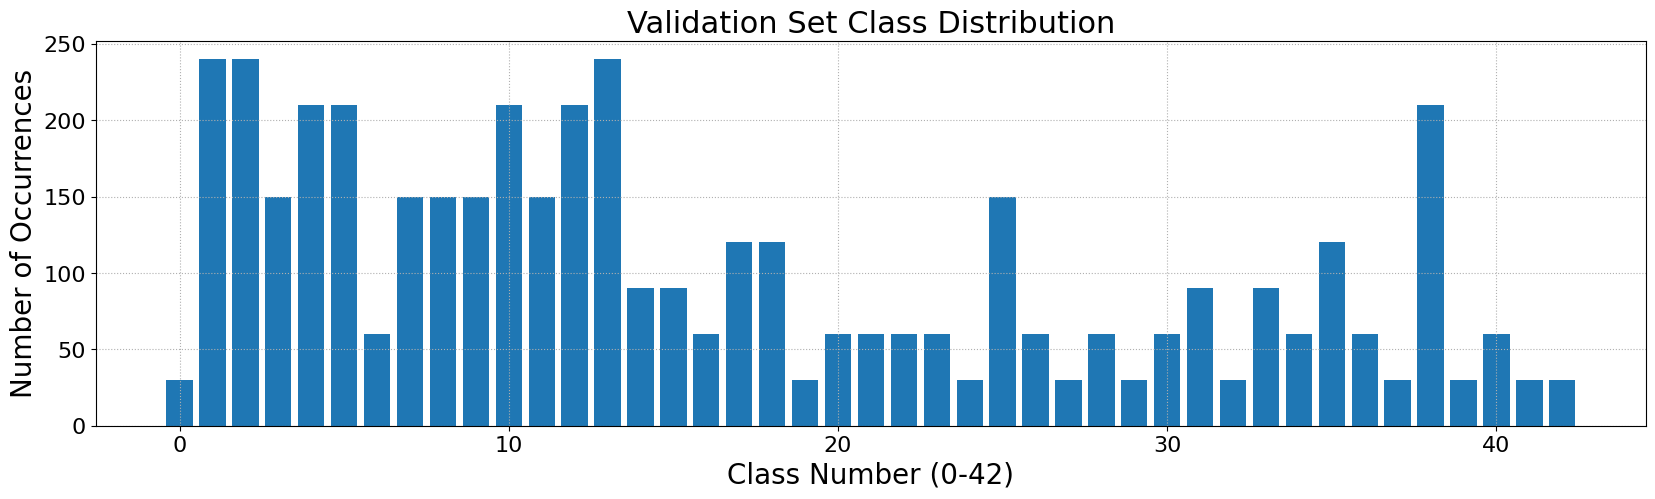

In [4]:
# Cell 3: Plot Class Distributions

def plot_class_distribution(y, title):
    plt.figure(figsize=(20, 5))
    unique_labels, label_counts = np.unique(y, return_counts=True)
    plt.bar(unique_labels, label_counts)
    plt.title(title, fontsize=22)
    plt.xlabel('Class Number (0-42)', fontsize=20)
    plt.ylabel('Number of Occurrences', fontsize=20)
    plt.tick_params(labelsize=16)
    plt.grid(linestyle=':')
    plt.show()

plot_class_distribution(y_train, 'Training Set Class Distribution')
plot_class_distribution(y_test, 'Testing Set Class Distribution')
plot_class_distribution(y_valid, 'Validation Set Class Distribution')

0 . Class :  Speed limit (20km/h)


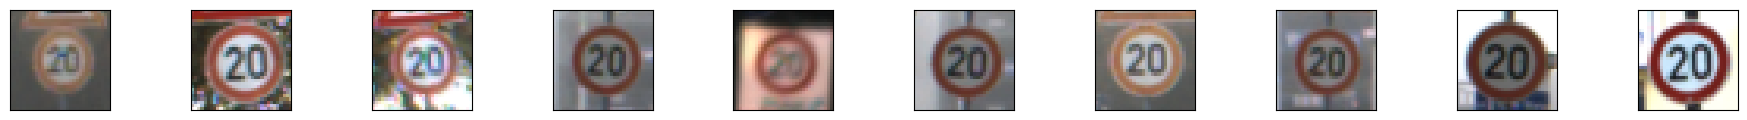

1 . Class :  Speed limit (30km/h)


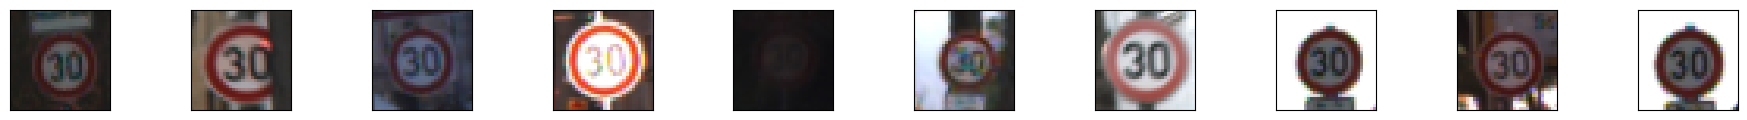

2 . Class :  Speed limit (50km/h)


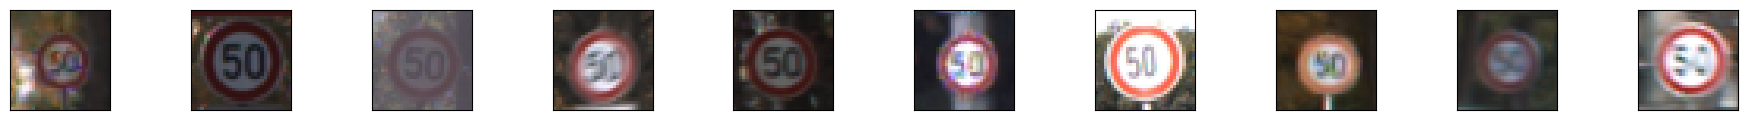

3 . Class :  Speed limit (60km/h)


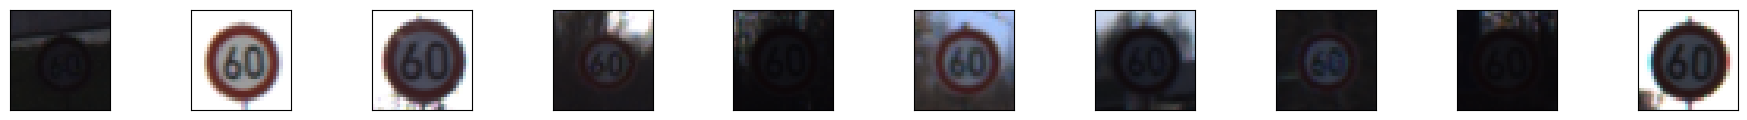

4 . Class :  Speed limit (70km/h)


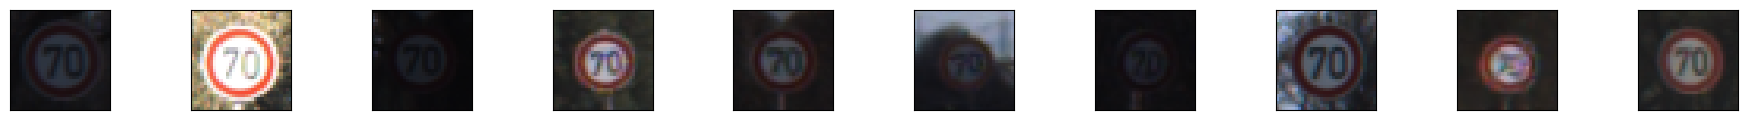

5 . Class :  Speed limit (80km/h)


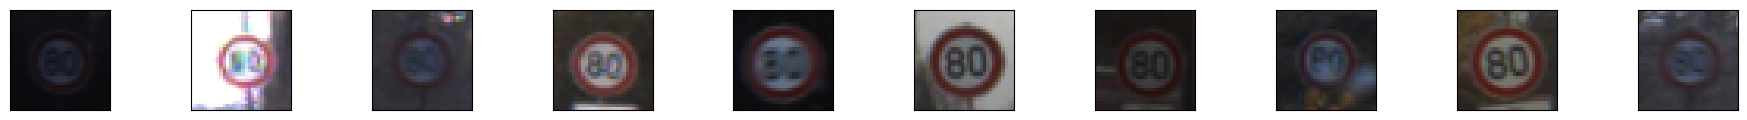

6 . Class :  End of speed limit (80km/h)


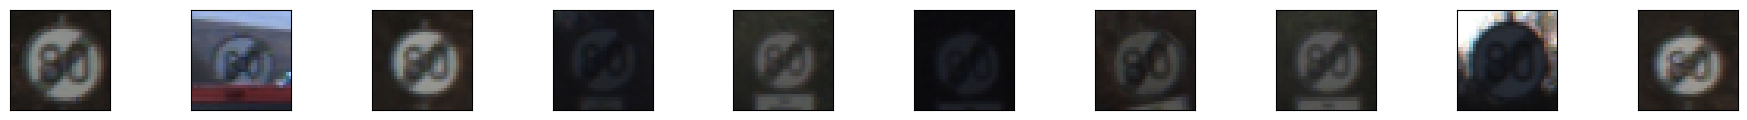

7 . Class :  Speed limit (100km/h)


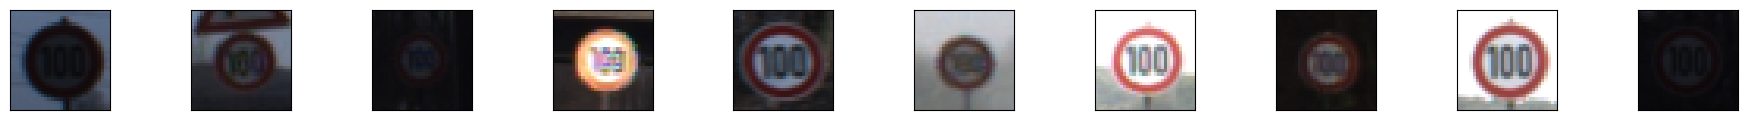

8 . Class :  Speed limit (120km/h)


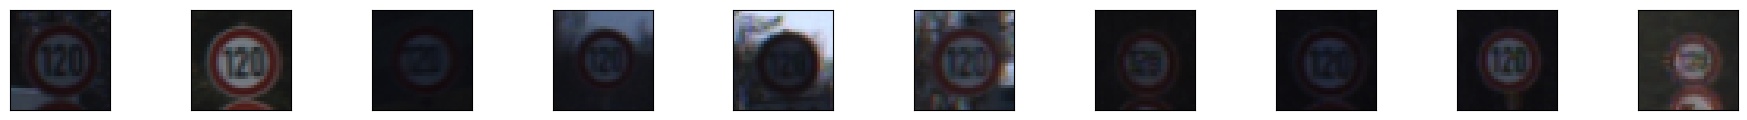

9 . Class :  No passing


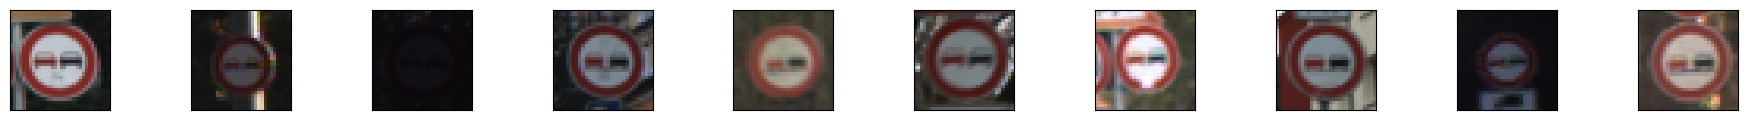

10 . Class :  No passing for vehicles over 3.5 metric tons


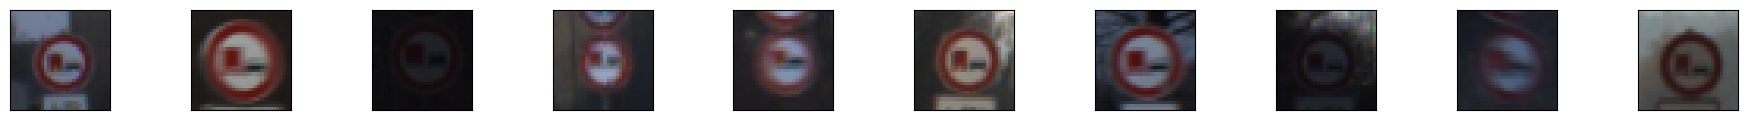

11 . Class :  Right-of-way at the next intersection


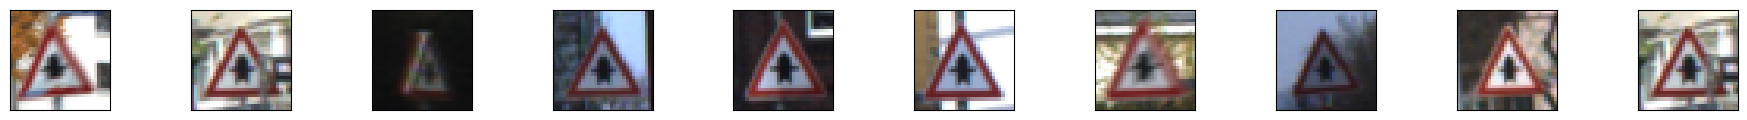

12 . Class :  Priority road


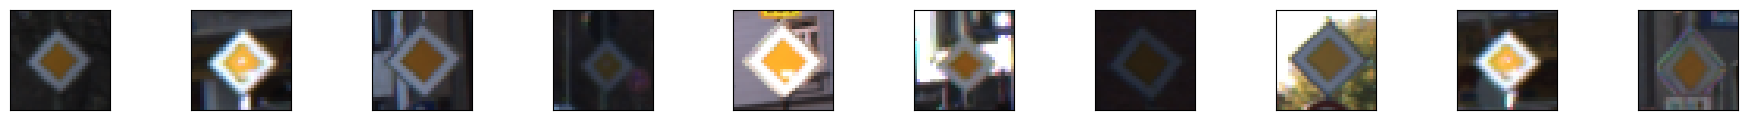

13 . Class :  Yield


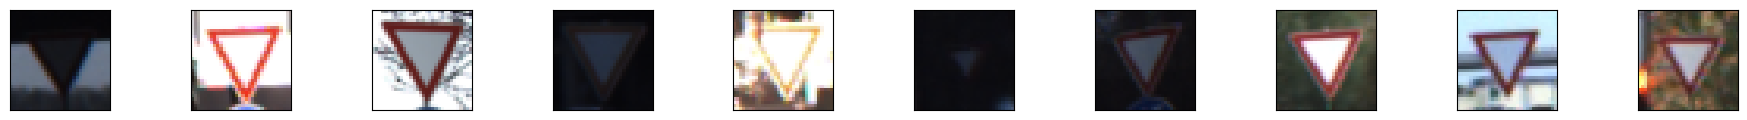

14 . Class :  Stop


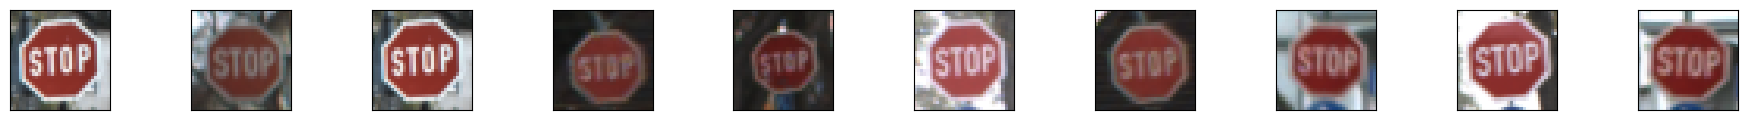

15 . Class :  No vehicles


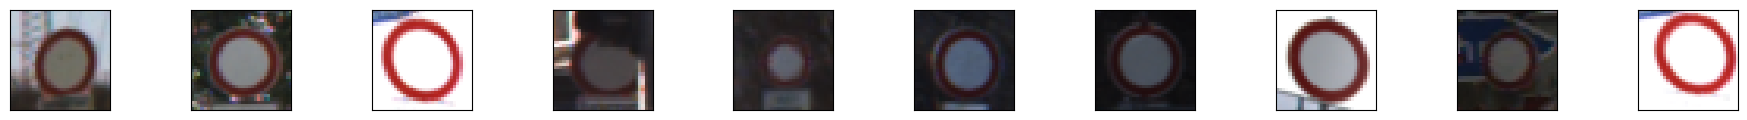

16 . Class :  Vehicles over 3.5 metric tons prohibited


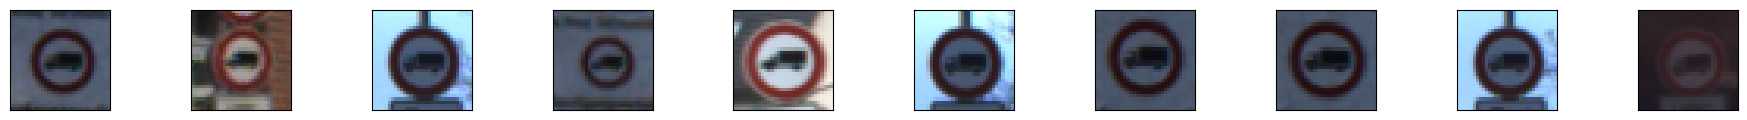

17 . Class :  No entry


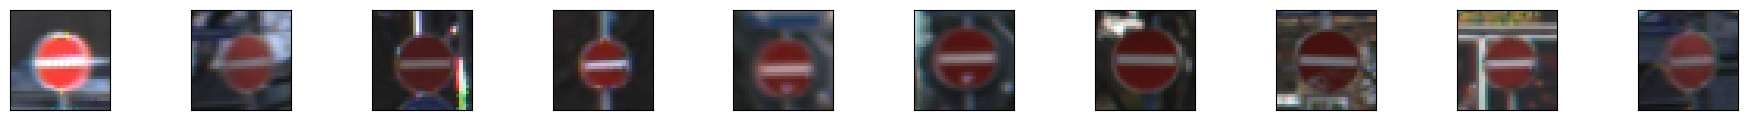

18 . Class :  General caution


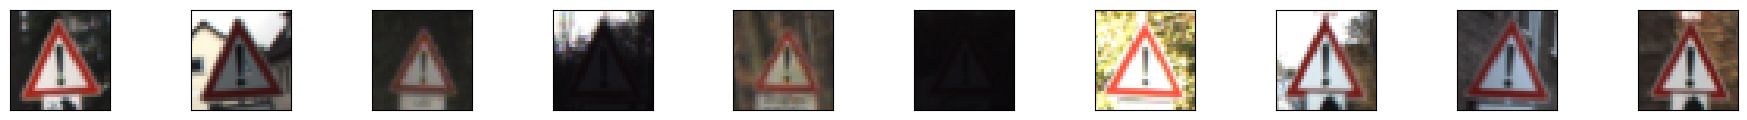

19 . Class :  Dangerous curve to the left


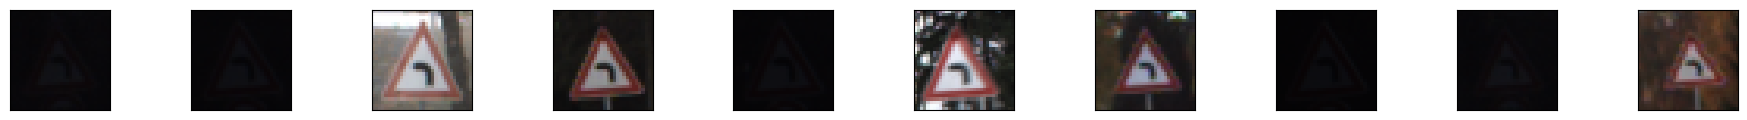

20 . Class :  Dangerous curve to the right


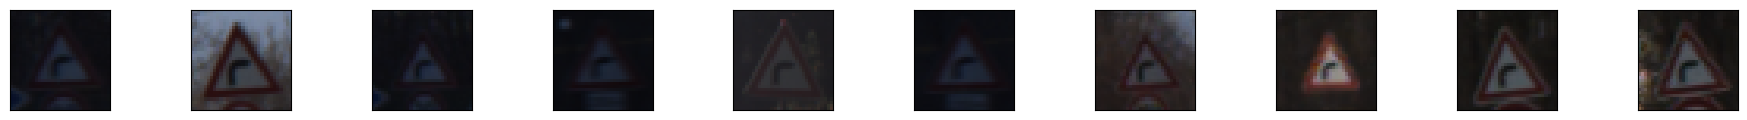

21 . Class :  Double curve


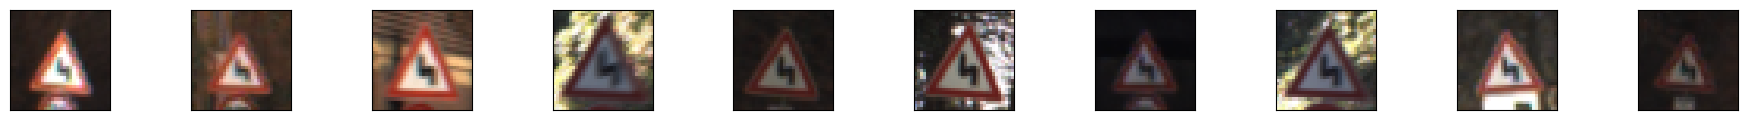

22 . Class :  Bumpy road


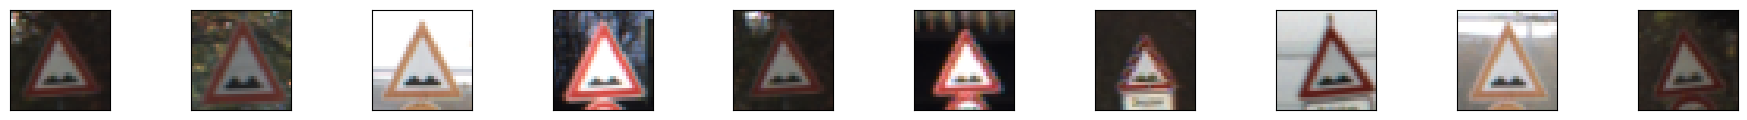

23 . Class :  Slippery road


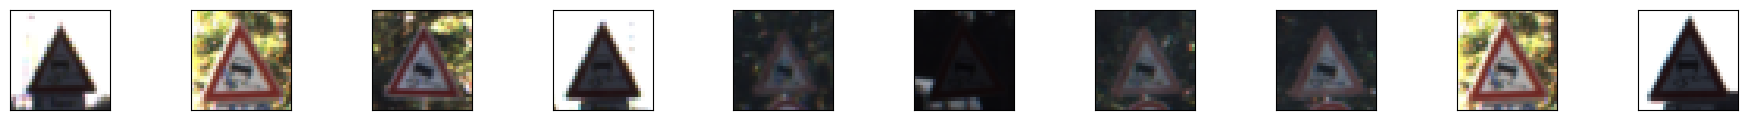

24 . Class :  Road narrows on the right


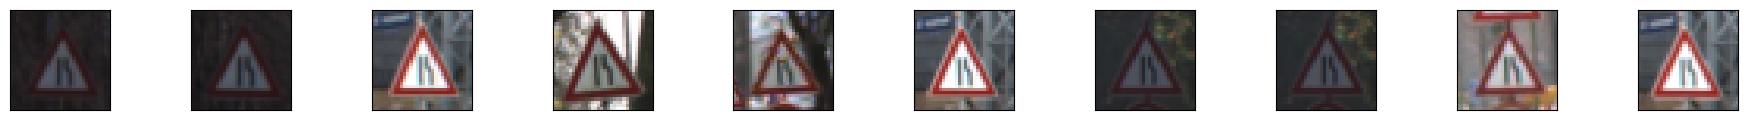

25 . Class :  Road work


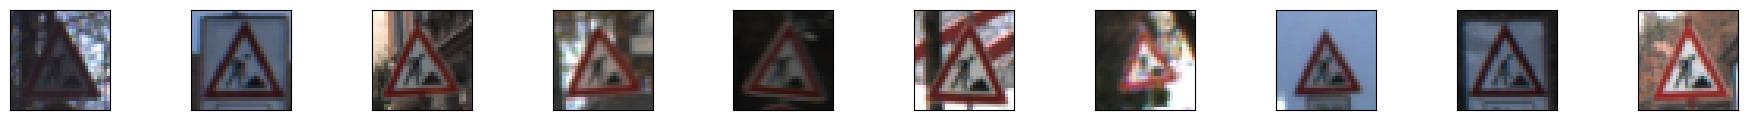

26 . Class :  Traffic signals


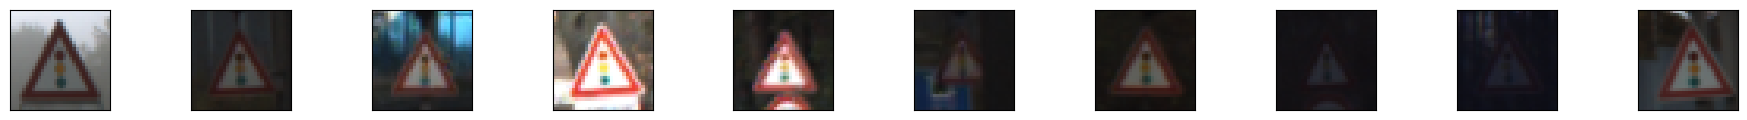

27 . Class :  Pedestrians


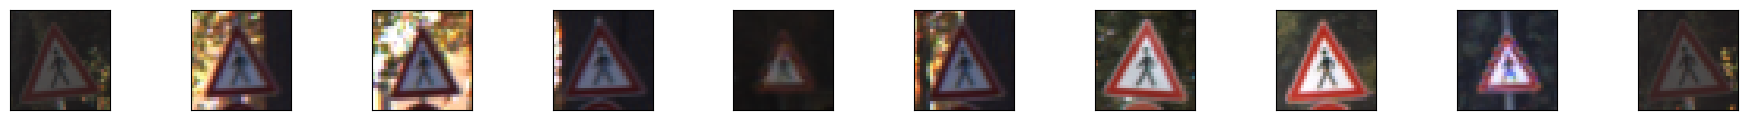

28 . Class :  Children crossing


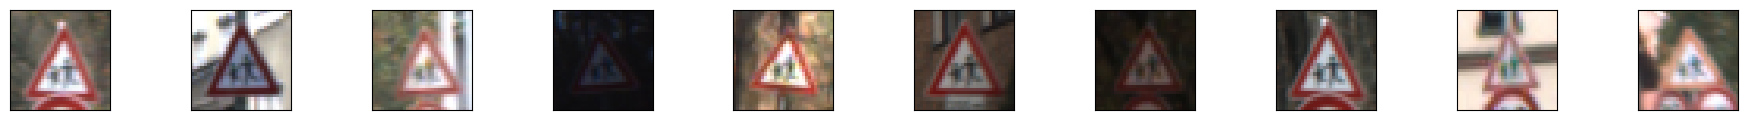

29 . Class :  Bicycles crossing


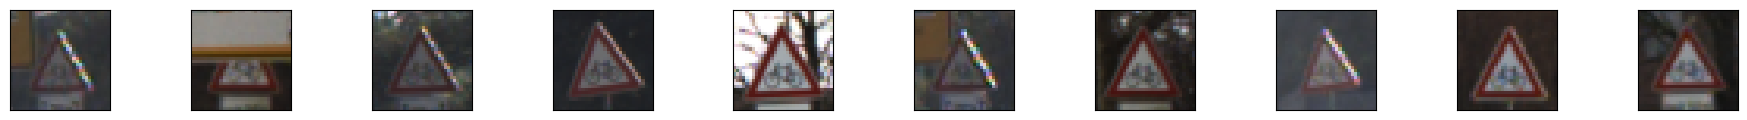

30 . Class :  Beware of ice/snow


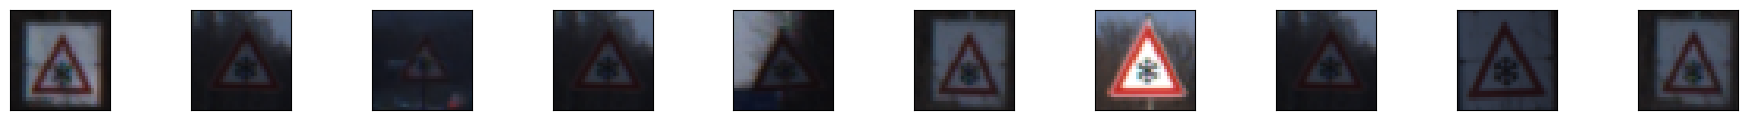

31 . Class :  Wild animals crossing


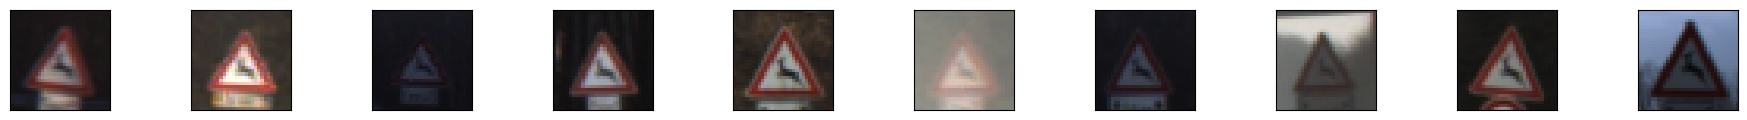

32 . Class :  End of all speed and passing limits


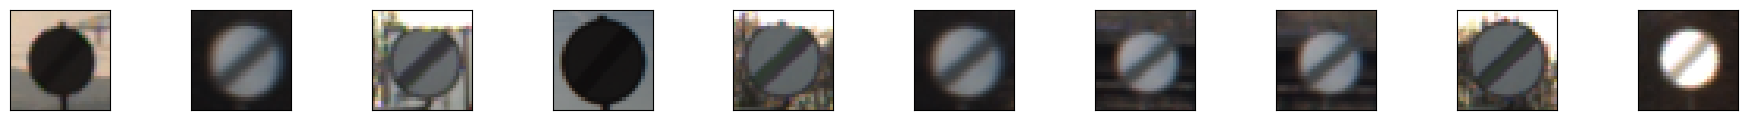

33 . Class :  Turn right ahead


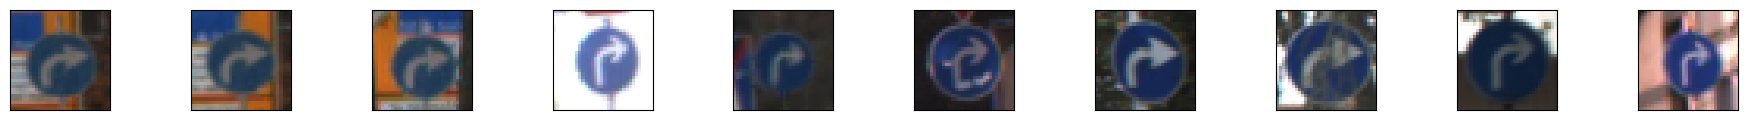

34 . Class :  Turn left ahead


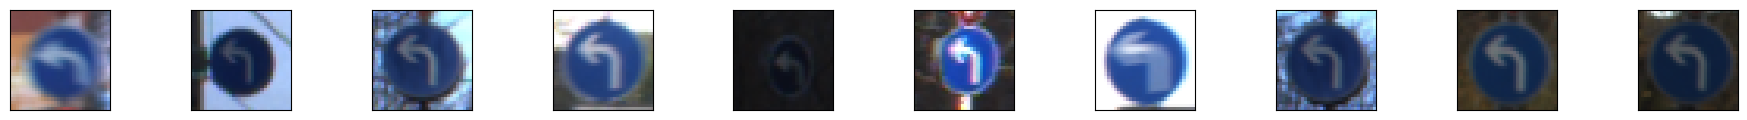

35 . Class :  Ahead only


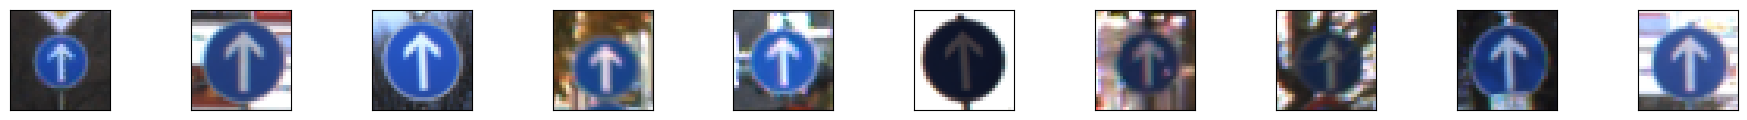

36 . Class :  Go straight or right


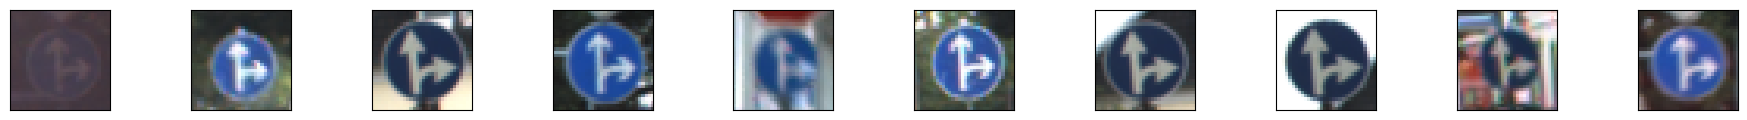

37 . Class :  Go straight or left


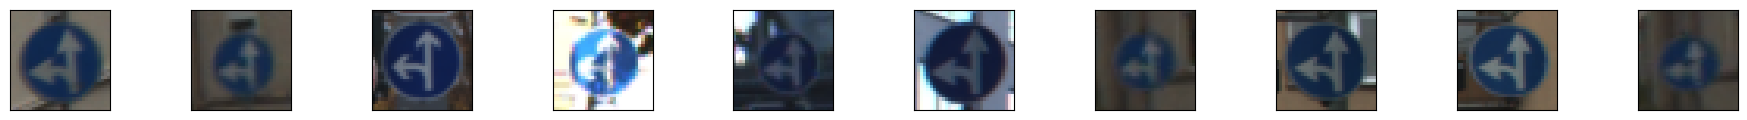

38 . Class :  Keep right


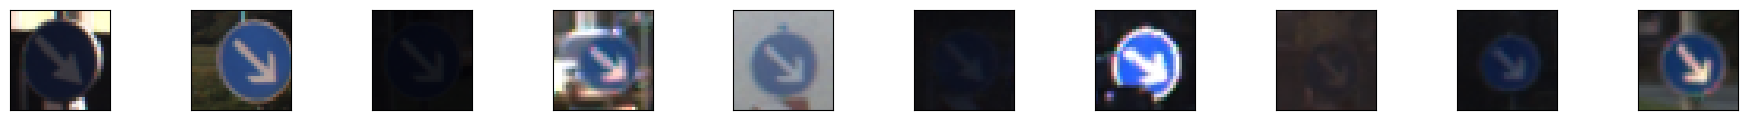

39 . Class :  Keep left


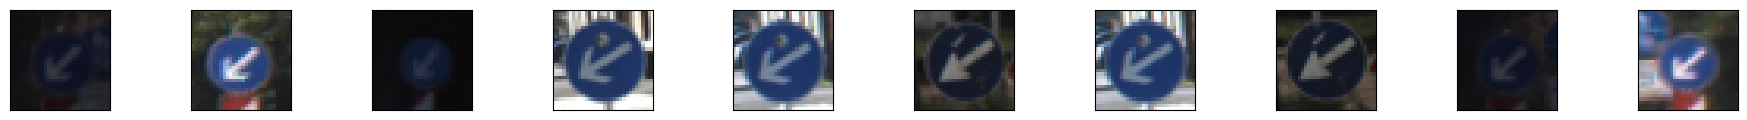

40 . Class :  Roundabout mandatory


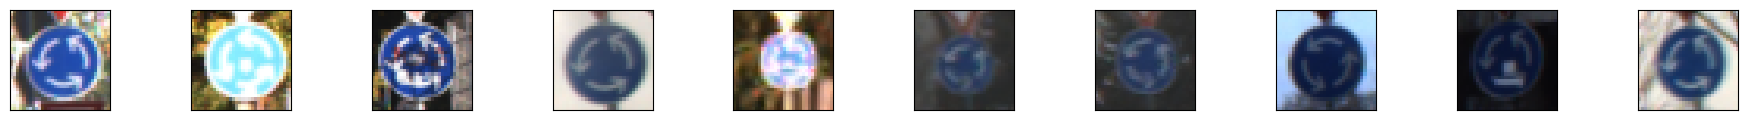

41 . Class :  End of no passing


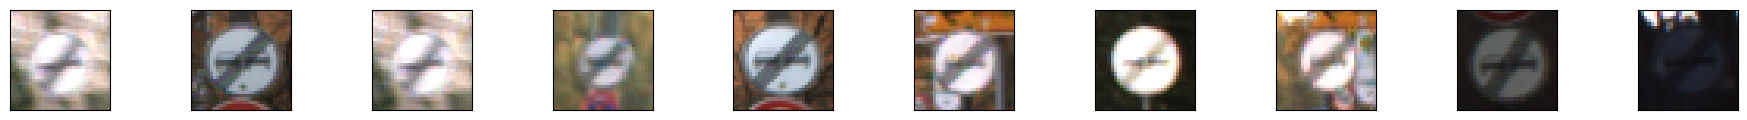

42 . Class :  End of no passing by vehicles over 3.5 metric


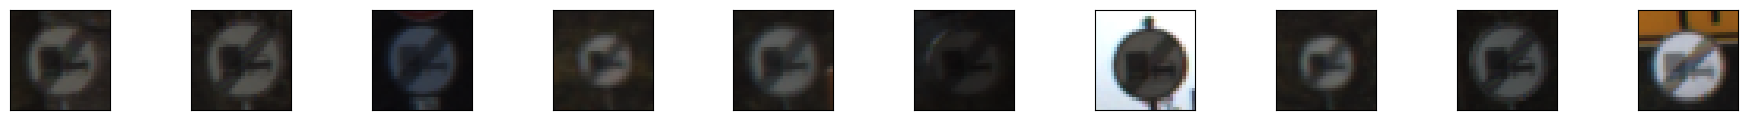

In [5]:
#Visualizations of image datasets for each class
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : ", sign_names[c] )
    fig = pyplot.figure(figsize = (18, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i+c_count, 10)
        axis.imshow(X_train[random_indices[i],:,:,:])
    pyplot.show()

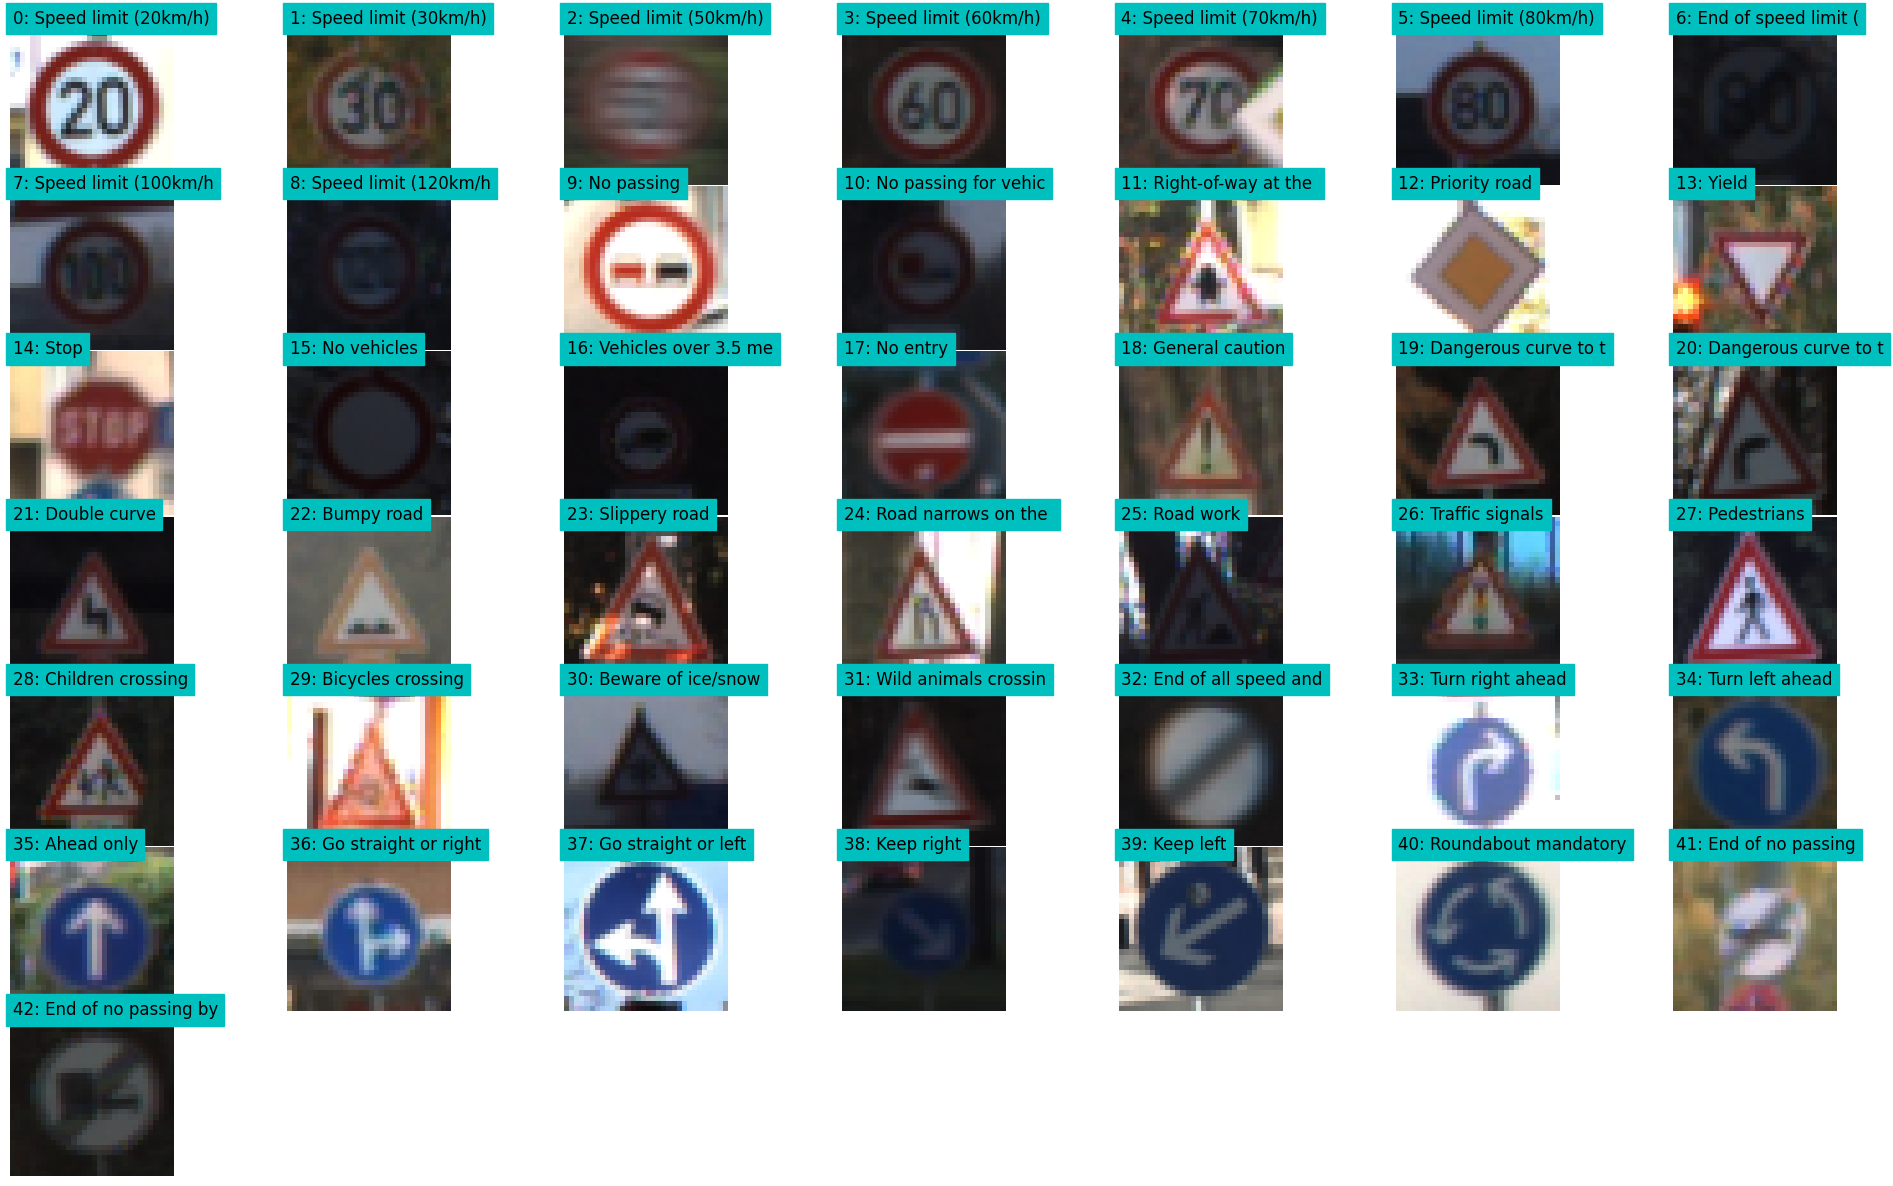

In [6]:
# Showing Random Image Datasets for Each Class

def plot_random_each_class(n_row, n_col, X, y):

    plt.figure(figsize=(25, 15))
    gs1 = gridspec.GridSpec(n_row, n_row)
    gs1.update(wspace=0.01, hspace=0.01)  # set the spacing between axes.

    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        ax1 = plt.subplot(gs1[c])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        ind_plot = np.random.randint(c_i, c_i+c_count)
        plt.imshow(X[ind_plot])
        plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k', backgroundcolor='c', fontsize=12)
        plt.axis('off')

    plt.show()

plot_random_each_class(7, 7, X_train, y_train)


In [7]:
# Cell 6: Data Augmentation

# Data Augmentation
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import cv2

def rotate_image(image, max_angle=15):
    rotate_out = rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')
    return rotate_out

def translate_image(image, max_trans=5, height=32, width=32):
    translate_x = max_trans * np.random.uniform() - max_trans/2
    translate_y = max_trans * np.random.uniform() - max_trans/2
    translation_mat = np.float32([[1, 0, translate_x], [0, 1, translate_y]])
    trans = cv2.warpAffine(image, translation_mat, (height, width))
    return trans

def projection_transform(image, max_warp=0.8, height=32, width=32):
    d = height * 0.3 * np.random.uniform(0, max_warp)
    tl_top = np.random.uniform(-d, d)
    tl_left = np.random.uniform(-d, d)
    bl_bottom = np.random.uniform(-d, d)
    bl_left = np.random.uniform(-d, d)
    tr_top = np.random.uniform(-d, d)
    tr_right = np.random.uniform(-d, d)
    br_bottom = np.random.uniform(-d, d)
    br_right = np.random.uniform(-d, d)

    transform = ProjectiveTransform()
    transform.estimate(np.array(((tl_left, tl_top), (bl_left, height - bl_bottom),
                                 (height - br_right, height - br_bottom), (height - tr_right, tr_top))),
                       np.array(((0, 0), (0, height), (height, height), (height, 0))))
    output_image = warp(image, transform, output_shape=(height, width), order=1, mode='edge')
    return output_image

In [8]:
#More Data Augmentation

def transform_image(image, max_angle=15, max_trans=5, max_warp=0.8):
    height, width, channels = image.shape
    rotated_image = rotate_image(image, max_angle)
    translated_image = translate_image(rotated_image, max_trans, height, width)
    output_image = projection_transform(translated_image, max_warp, height, width)
    return (output_image * 255.0).astype(np.uint8)


def augment_and_balance_data(X_train, y_train, no_examples_per_class=5000):

    n_examples = no_examples_per_class
    X_balance = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype=np.float32)
    y_balance = np.empty([0], dtype=y_train.dtype)

    for c, count in zip(range(n_classes), class_counts):
        X_orig = X_train[y_train == c]
        y_orig = y_train[y_train == c]
        X_balance = np.append(X_balance, X_orig, axis=0)
        temp_X = np.empty([n_examples - count, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype=np.float32)
        for i in range(n_examples - count):
            temp_X[i, :, :, :] = transform_image(X_orig[i % count])
        X_balance = np.append(X_balance, temp_X, axis=0)
        n_added_ex = X_balance.shape[0] - y_balance.shape[0]
        y_balance = np.append(y_balance, np.full(n_added_ex, c, dtype=int))

    return X_balance.astype(np.uint8), y_balance


In [9]:
#Data Preprocessig
from sklearn.utils import shuffle

## Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)
# Convert RGB images to grayscale for the training set
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the testing set
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the validation set
X_validation_gray  = np.sum(X_valid/3, axis=3, keepdims=True)
# Normalize the training set of grayscale images
X_train_gray_norm = (X_train_gray - 32) / 32

# Normalize the test set of grayscale images
X_test_gray_norm = (X_test_gray - 32) / 32

# Normalize the validation set of grayscale images
X_validation_gray_norm = (X_validation_gray - 32) / 32


In [10]:
# Onehot Encoding the labels.
from tensorflow.keras.utils import to_categorical

# Store the original labels for future reference
y_train_unchanged = y_train
y_validation_unchanged = y_valid
y_test_unchanged = y_test

# Perform Onehot Encoding on the labels
# Convert the labels from integer representation to binary matrix representation
y_train = to_categorical(y_train)
y_validation = to_categorical(y_valid)
y_test = to_categorical(y_test)
# Shape of Train dataset
print(X_train.shape)

# Shape of Test dataset
print(X_test.shape)

# Shape of Validation dataset
print(X_valid.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


**DenseNET**

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.densenet import DenseNet121

import numpy as np

np.random.seed(1000)

# Create a Sequential model
model = Sequential()

# Add the 1st Convolutional Layer to expand single-channel input to three channels
model.add(Conv2D(filters=3, kernel_size=(1, 1), input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add the DenseNet121 base model
base_model = DenseNet121(include_top=False, input_shape=(32, 32, 3))
model.add(base_model)

# Flatten the input
model.add(Flatten())

# Add the 1st Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the Output layer
model.add(Dense(43))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Print the model summary
model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 3)         6         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 3)         12        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 3)         0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 4096)              41

In [12]:
from tensorflow.keras.optimizers import Adam

# Compile the DenseNet model with specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with the specified training data, validation data, callbacks, and batch size
history = model.fit(X_train_gray_norm, y_train, epochs=25, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/25
1088/1088 [==============================] - 172s 91ms/step - loss: 1.1920 - accuracy: 0.7180 - val_loss: 0.9485 - val_accuracy: 0.7859
Epoch 2/25
1088/1088 [==============================] - 88s 81ms/step - loss: 0.4112 - accuracy: 0.9237 - val_loss: 0.9330 - val_accuracy: 0.8240
Epoch 3/25
1088/1088 [==============================] - 90s 83ms/step - loss: 0.2533 - accuracy: 0.9542 - val_loss: 0.4036 - val_accuracy: 0.9159
Epoch 4/25
1088/1088 [==============================] - 89s 82ms/step - loss: 0.1713 - accuracy: 0.9682 - val_loss: 0.3536 - val_accuracy: 0.9240
Epoch 5/25
1088/1088 [==============================] - 91s 84ms/step - loss: 0.1356 - accuracy: 0.9744 - val_loss: 0.2600 - val_accuracy: 0.9447
Epoch 6/25
1088/1088 [==============================] - 91s 83ms/step - loss: 0.1049 - accuracy: 0.9797 - val_loss: 0.2934 - val_accuracy: 0.9429
Epoch 7/25
1088/1088 [==============================] - 91s 83ms/step - loss: 0.0932 - accuracy: 0.9819 - val_loss: 0.3370 

In [19]:
from keras.models import Sequential, load_model
# Save the model
model.save("best_DenseNet_model.h5")

# Load the best trained model from the saved file
best_DenseNet = load_model('best_DenseNet_model.h5')

# Evaluate the model performance on the test data
evaluation_results = best_DenseNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 8s 15ms/step - loss: 0.2710 - accuracy: 0.9455


395/395 [==============================] - 8s 15ms/step
Accuracy on test dataset: 94.55%


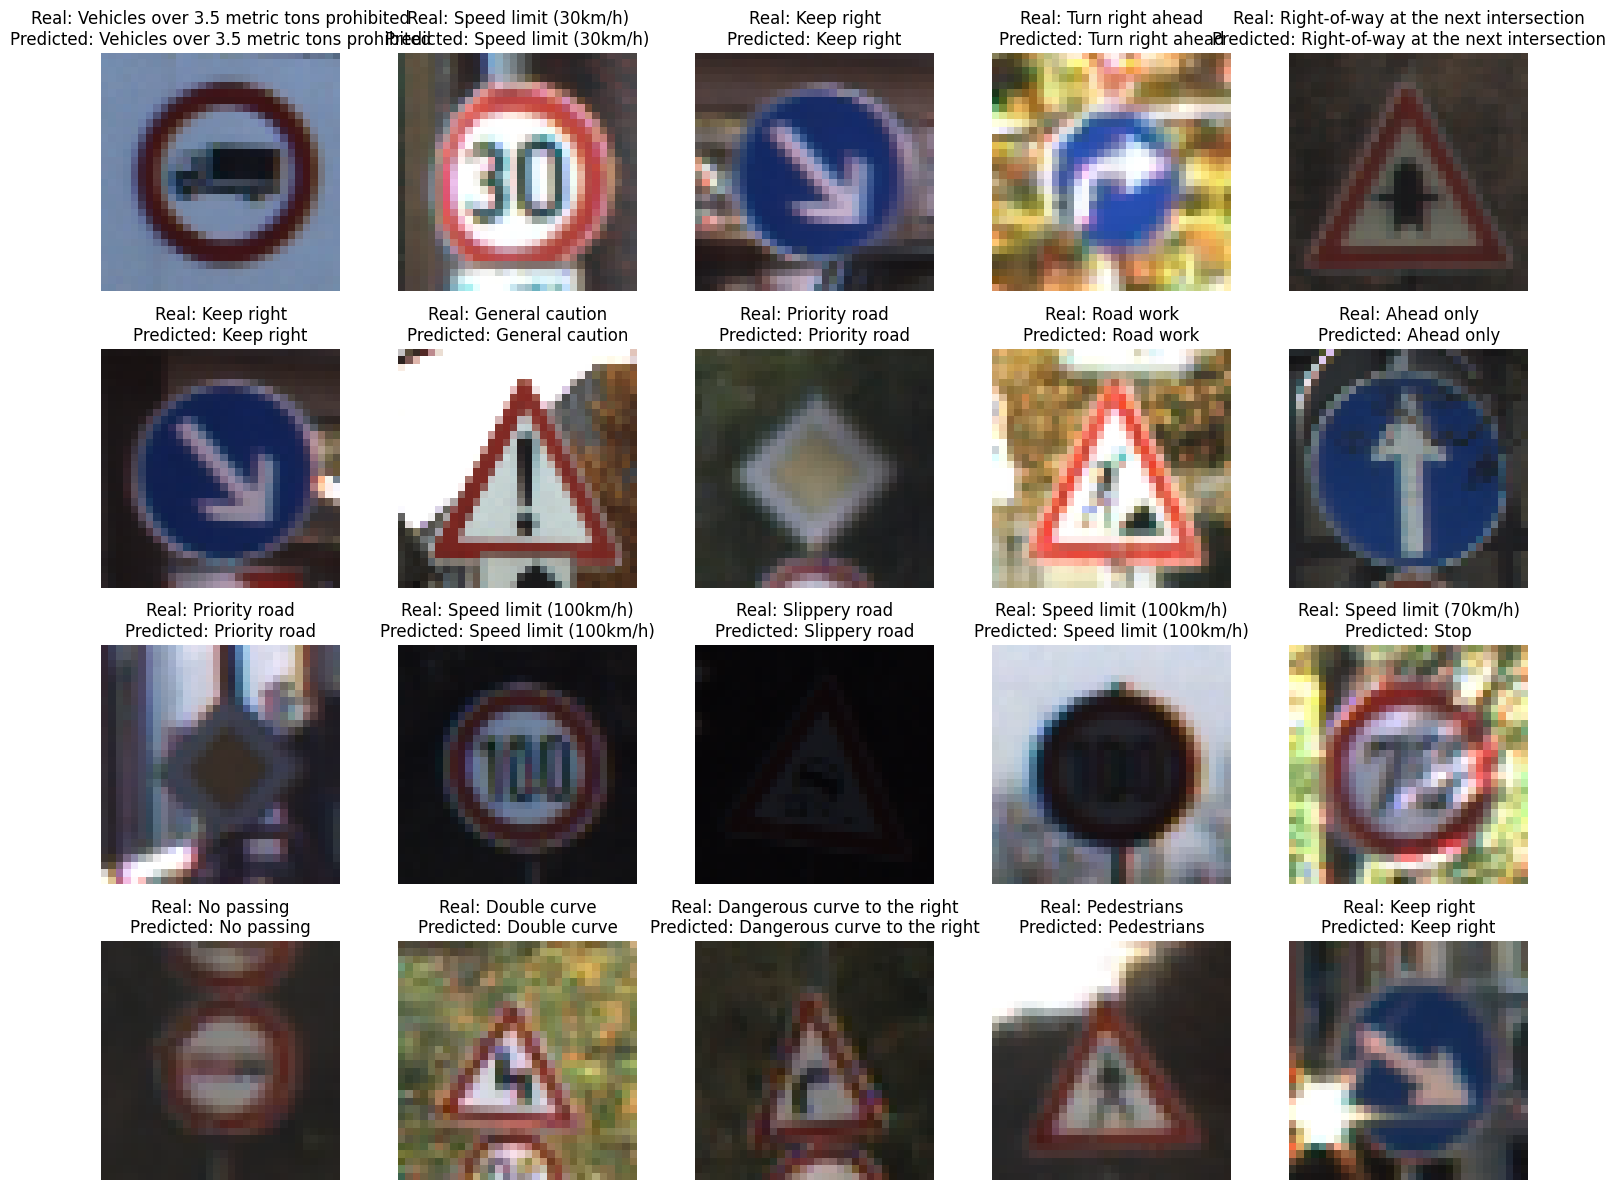

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# Predict on the test dataset
predictions = best_DenseNet.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to class names
predicted_classes = [sign_names[label] for label in predicted_labels]

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on test dataset: {:.2%}".format(accuracy))

# Visualize the test dataset with real and predicted labels
num_rows = 4
num_cols = 5
plt.figure(figsize=(15, 12))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Real: {}\nPredicted: {}".format(sign_names[np.argmax(y_test[i])], predicted_classes[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
!pip install gtts


In [22]:
import numpy as np
from gtts import gTTS  # Google Text-to-Speech library
from IPython.display import Audio, display, HTML


# Predict on the test dataset
predictions = best_DenseNet.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to class names
predicted_classes = [sign_names[label] for label in predicted_labels]

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
accuracy_percentage = "{:.2%}".format(accuracy)
accuracy_message = f"Accuracy on test dataset: {accuracy_percentage}"
print(accuracy_message)

# Provide real-time information through auditory feedback for the first 10 images
for i in range(1):
    real_label = sign_names[np.argmax(y_test[i])]
    predicted_label = predicted_classes[i]

    # Generate an auditory message
    print(f"Real sign: {real_label}")
    message = f"Predicted sign: {predicted_label}."
    print(message)

    # Convert text to speech and display as an audio widget in Colab
    tts = gTTS(message)
    tts.save("output.mp3")
    display(Audio("output.mp3", autoplay=True))



395/395 [==============================] - 10s 24ms/step
Accuracy on test dataset: 94.55%
Real sign: Vehicles over 3.5 metric tons prohibited
Predicted sign: Vehicles over 3.5 metric tons prohibited.


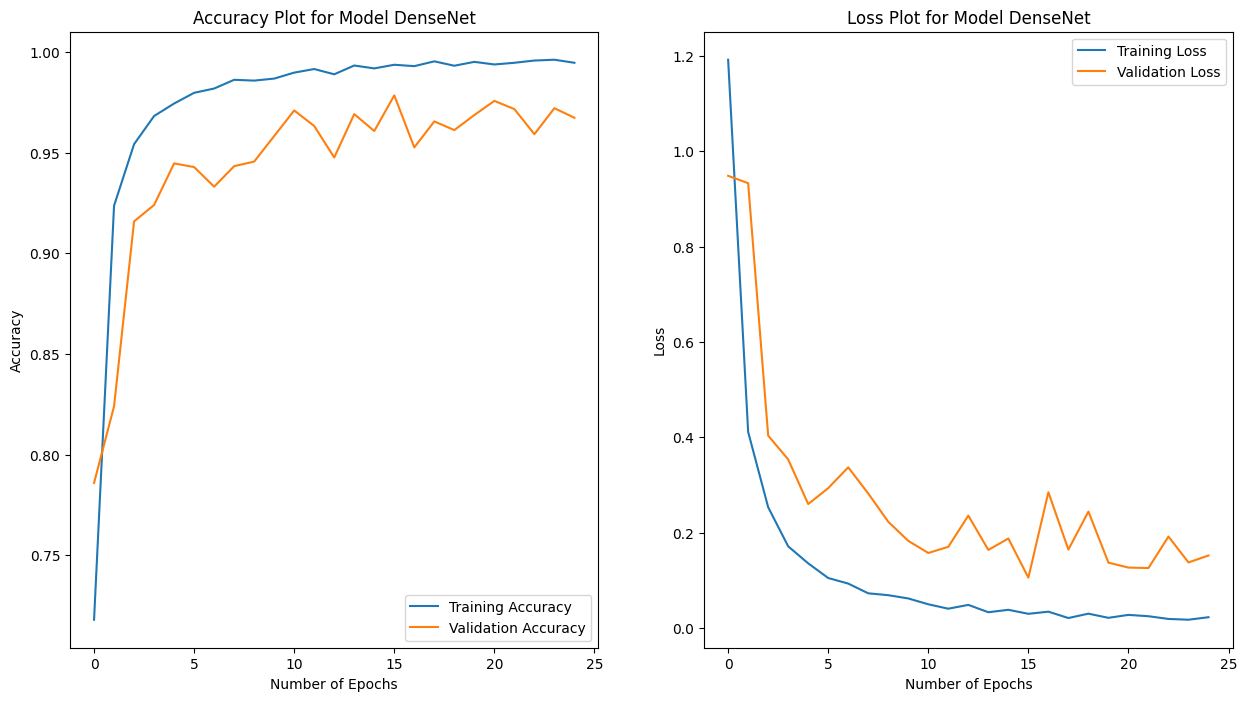

In [23]:
# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model  on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model DenseNet')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model  on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model DenseNet')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = best_DenseNet.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model DenseNet:")
print(classification_rep)

395/395 [==============================] - 6s 15ms/step

Classification Report for Model DenseNet:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        60
           1       0.93      0.97      0.95       720
           2       0.98      0.99      0.98       750
           3       0.93      0.94      0.93       450
           4       0.94      0.96      0.95       660
           5       0.94      0.96      0.95       630
           6       0.98      0.81      0.89       150
           7       0.97      0.85      0.91       450
           8       0.88      0.94      0.91       450
           9       0.89      1.00      0.94       480
          10       0.97      1.00      0.99       660
          11       0.93      0.89      0.91       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       0.95      0.99      0.97       270
          15       1.00      0.93   

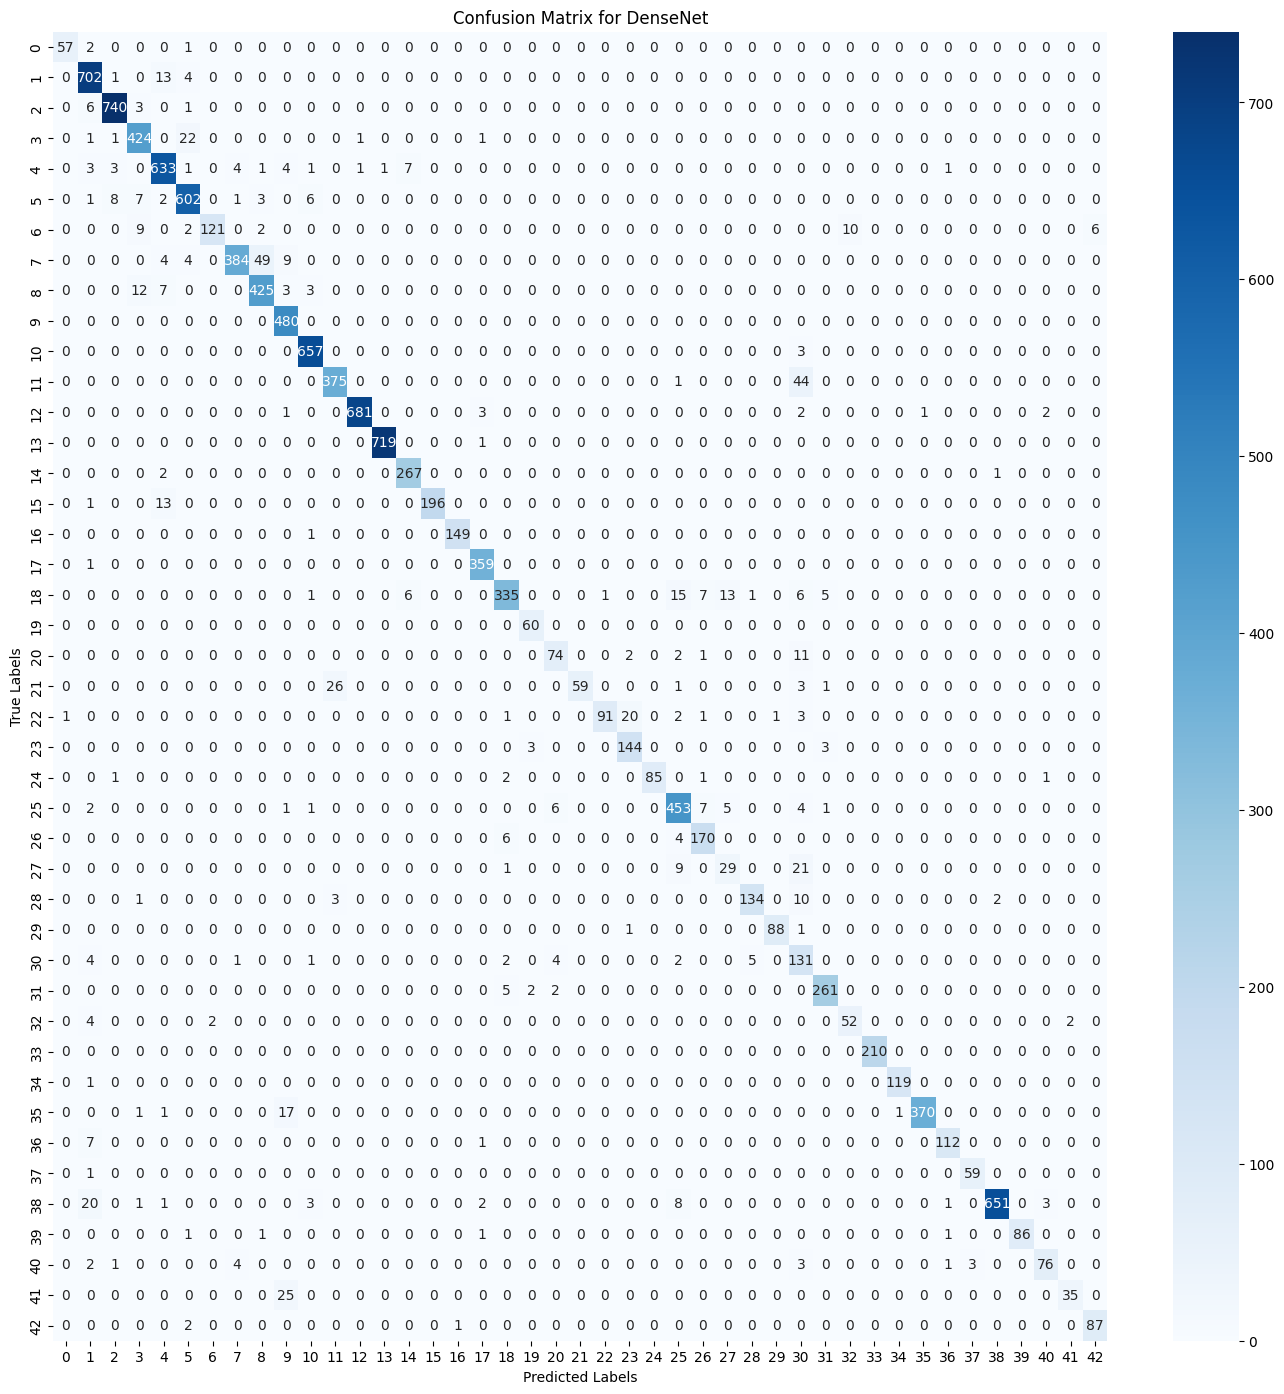

In [26]:
import seaborn as sns
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for DenseNet')
plt.show()